In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


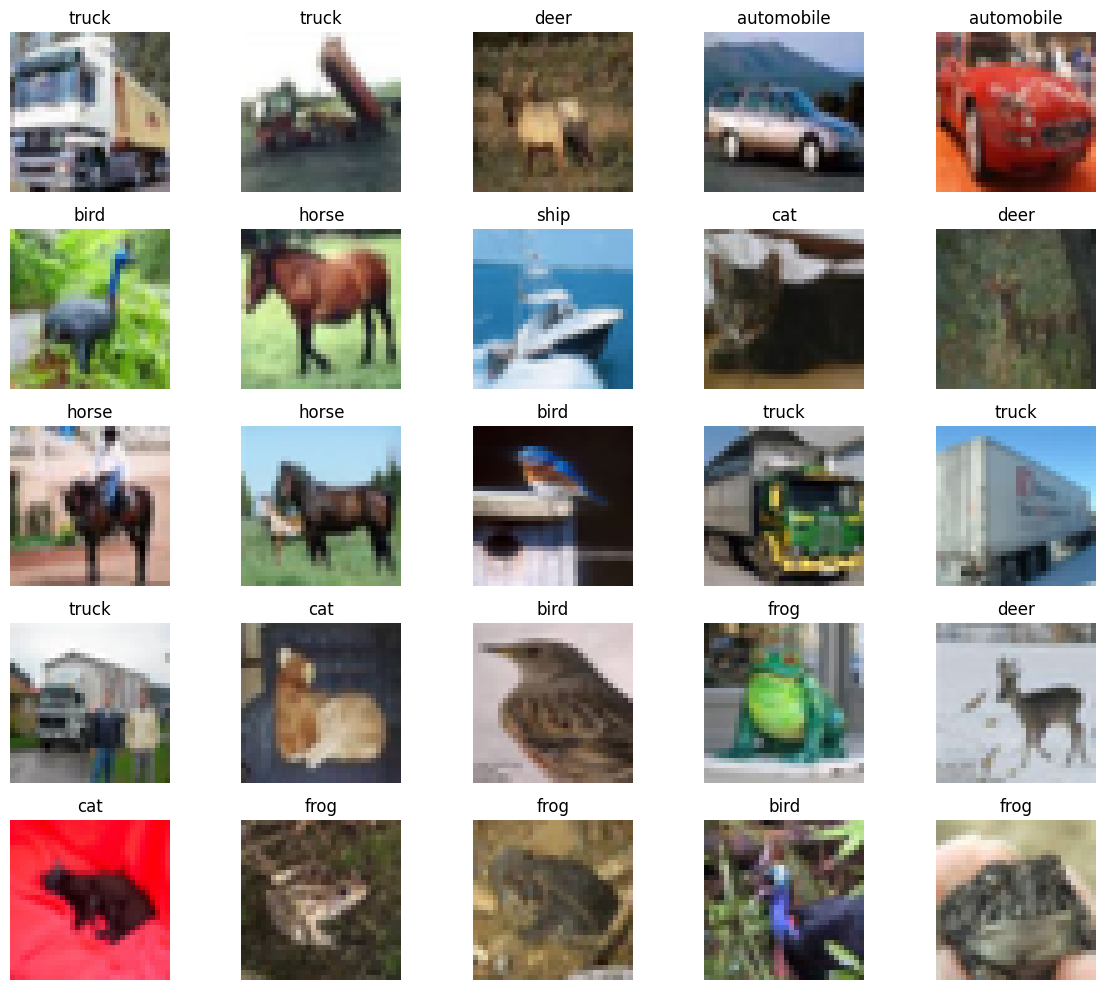

In [5]:
visualize_images(sample,(5,5))

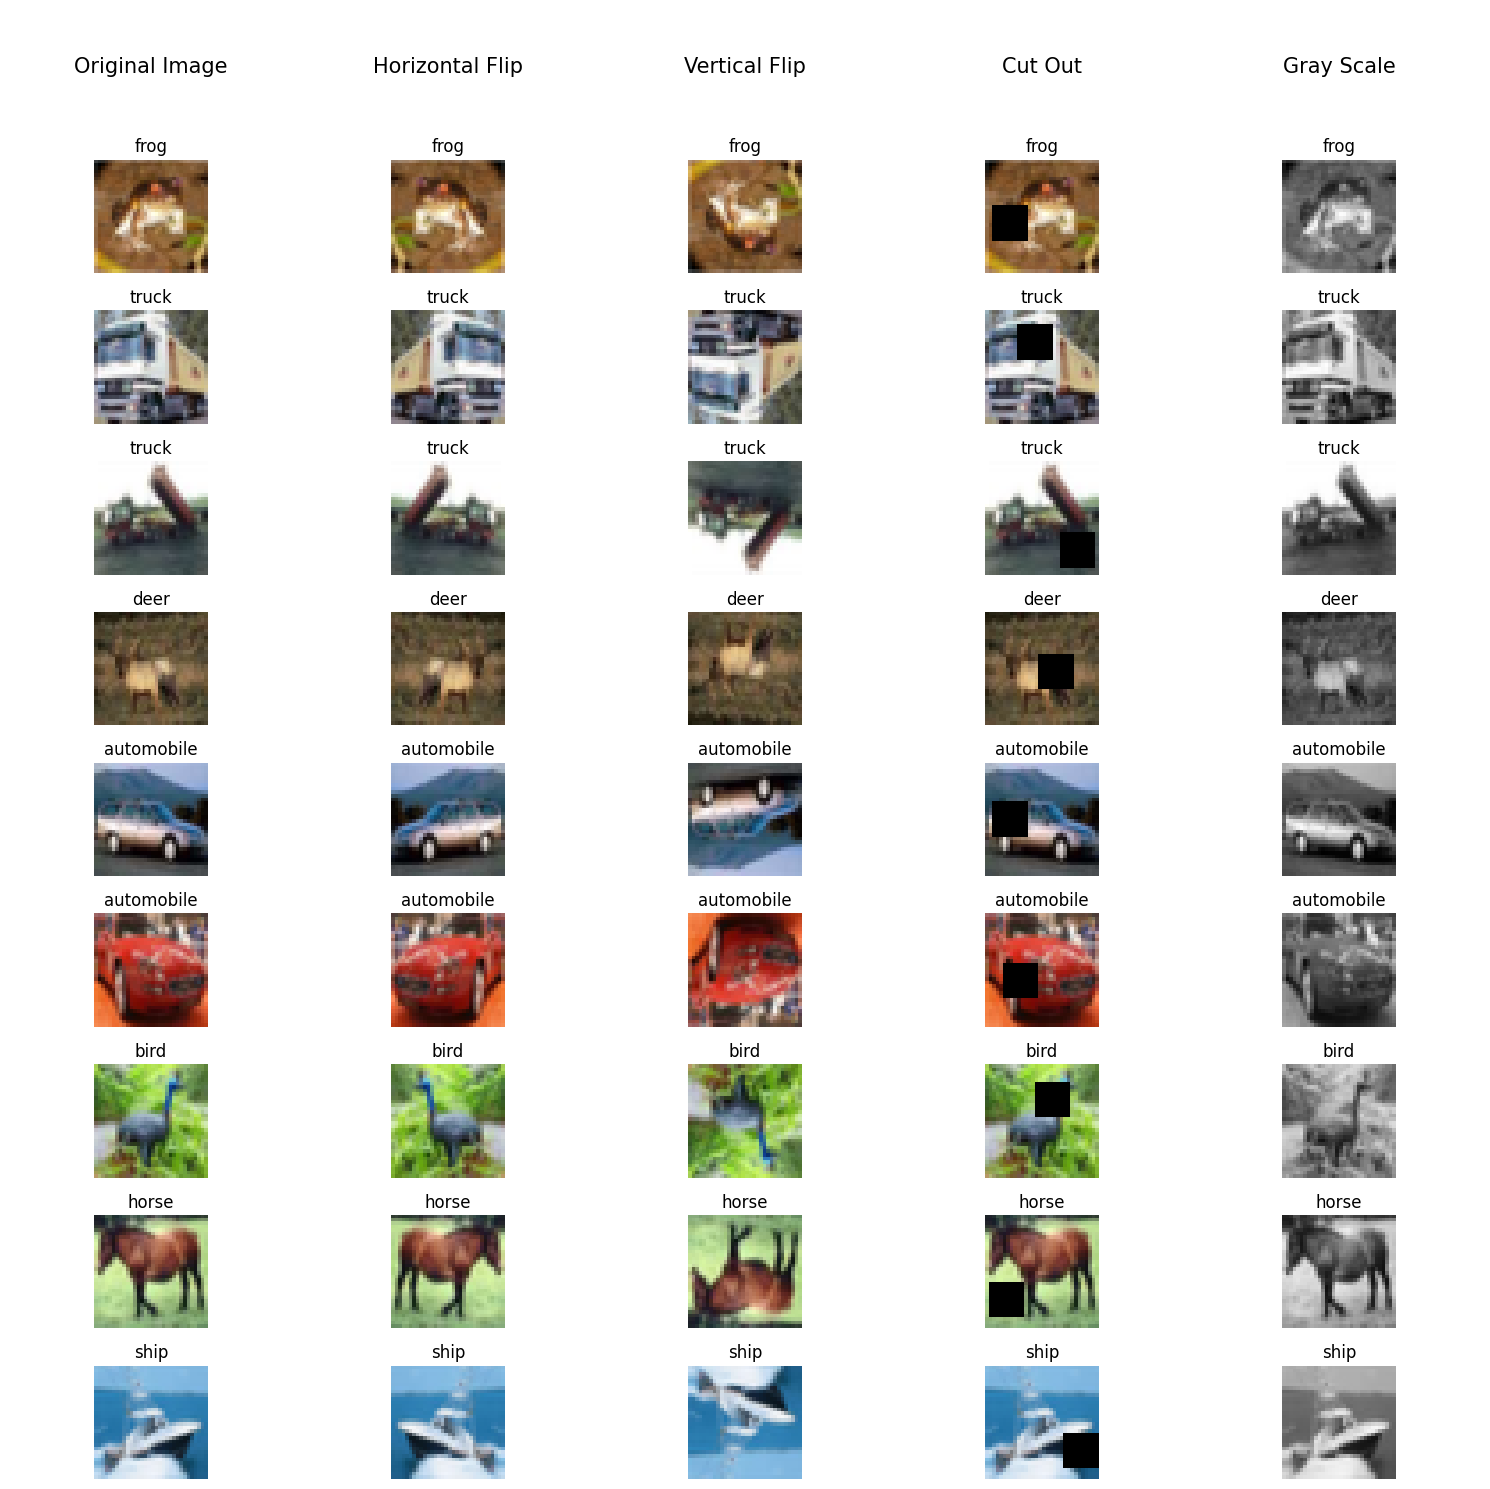

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="ln").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 20,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.6215 Batch_id=1562 Accuracy=28.77: 100%|██████████| 1563/1563 [00:29<00:00, 52.89it/s]


Test set: Average loss: 1.5678, Accuracy: 4335/10000 (43.35%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.6176 Batch_id=1562 Accuracy=39.50: 100%|██████████| 1563/1563 [00:29<00:00, 53.61it/s]


Test set: Average loss: 1.3697, Accuracy: 5081/10000 (50.81%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.2585 Batch_id=1562 Accuracy=44.72: 100%|██████████| 1563/1563 [00:30<00:00, 51.94it/s]


Test set: Average loss: 1.2962, Accuracy: 5385/10000 (53.85%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.1099 Batch_id=1562 Accuracy=47.89: 100%|██████████| 1563/1563 [00:28<00:00, 54.11it/s]


Test set: Average loss: 1.1663, Accuracy: 5875/10000 (58.75%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.1671 Batch_id=1562 Accuracy=50.72: 100%|██████████| 1563/1563 [00:29<00:00, 53.50it/s]


Test set: Average loss: 1.1152, Accuracy: 6100/10000 (61.00%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.7238 Batch_id=1562 Accuracy=52.64: 100%|██████████| 1563/1563 [00:28<00:00, 54.42it/s]


Test set: Average loss: 1.0636, Accuracy: 6211/10000 (62.11%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.8006 Batch_id=1562 Accuracy=53.38: 100%|██████████| 1563/1563 [00:28<00:00, 54.62it/s]


Test set: Average loss: 1.0117, Accuracy: 6472/10000 (64.72%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.2583 Batch_id=1562 Accuracy=54.55: 100%|██████████| 1563/1563 [00:28<00:00, 54.64it/s]


Test set: Average loss: 1.0312, Accuracy: 6453/10000 (64.53%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=0.9283 Batch_id=1562 Accuracy=55.91: 100%|██████████| 1563/1563 [00:28<00:00, 54.54it/s]


Test set: Average loss: 0.9530, Accuracy: 6680/10000 (66.80%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=1.3695 Batch_id=1562 Accuracy=56.85: 100%|██████████| 1563/1563 [00:28<00:00, 53.92it/s]


Test set: Average loss: 0.9327, Accuracy: 6785/10000 (67.85%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=0.8590 Batch_id=1562 Accuracy=57.42: 100%|██████████| 1563/1563 [00:28<00:00, 54.12it/s]


Test set: Average loss: 0.9094, Accuracy: 6847/10000 (68.47%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=0.9122 Batch_id=1562 Accuracy=58.27: 100%|██████████| 1563/1563 [00:29<00:00, 53.51it/s]


Test set: Average loss: 0.9035, Accuracy: 6901/10000 (69.01%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=0.8049 Batch_id=1562 Accuracy=58.76: 100%|██████████| 1563/1563 [00:29<00:00, 53.45it/s]


Test set: Average loss: 0.9107, Accuracy: 6856/10000 (68.56%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=0.9190 Batch_id=1562 Accuracy=59.53: 100%|██████████| 1563/1563 [00:29<00:00, 52.44it/s]


Test set: Average loss: 0.8658, Accuracy: 7040/10000 (70.40%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=0.5632 Batch_id=1562 Accuracy=59.52: 100%|██████████| 1563/1563 [00:28<00:00, 54.06it/s]


Test set: Average loss: 0.8570, Accuracy: 7045/10000 (70.45%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=1.2238 Batch_id=1562 Accuracy=60.21: 100%|██████████| 1563/1563 [00:30<00:00, 51.95it/s]


Test set: Average loss: 0.8386, Accuracy: 7106/10000 (71.06%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=1.3954 Batch_id=1562 Accuracy=60.80: 100%|██████████| 1563/1563 [00:29<00:00, 53.78it/s]


Test set: Average loss: 0.8443, Accuracy: 7056/10000 (70.56%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=1.4060 Batch_id=1562 Accuracy=60.92: 100%|██████████| 1563/1563 [00:28<00:00, 55.18it/s]


Test set: Average loss: 0.8115, Accuracy: 7205/10000 (72.05%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=0.8992 Batch_id=1562 Accuracy=61.58: 100%|██████████| 1563/1563 [00:28<00:00, 54.90it/s]


Test set: Average loss: 0.8356, Accuracy: 7138/10000 (71.38%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=0.6825 Batch_id=1562 Accuracy=62.09: 100%|██████████| 1563/1563 [00:28<00:00, 55.51it/s]


Test set: Average loss: 0.7971, Accuracy: 7241/10000 (72.41%)

Adjusting learning rate of group 0 to 6.0016e-04.


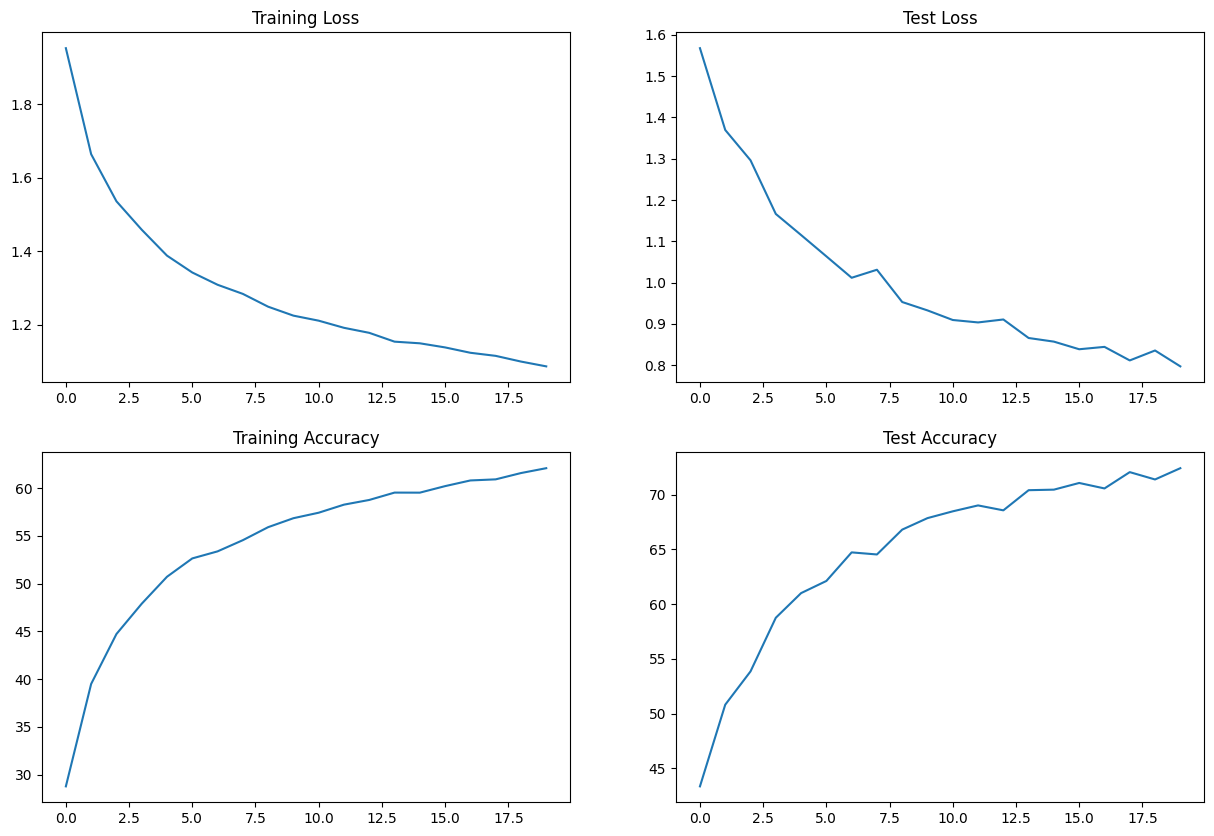

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

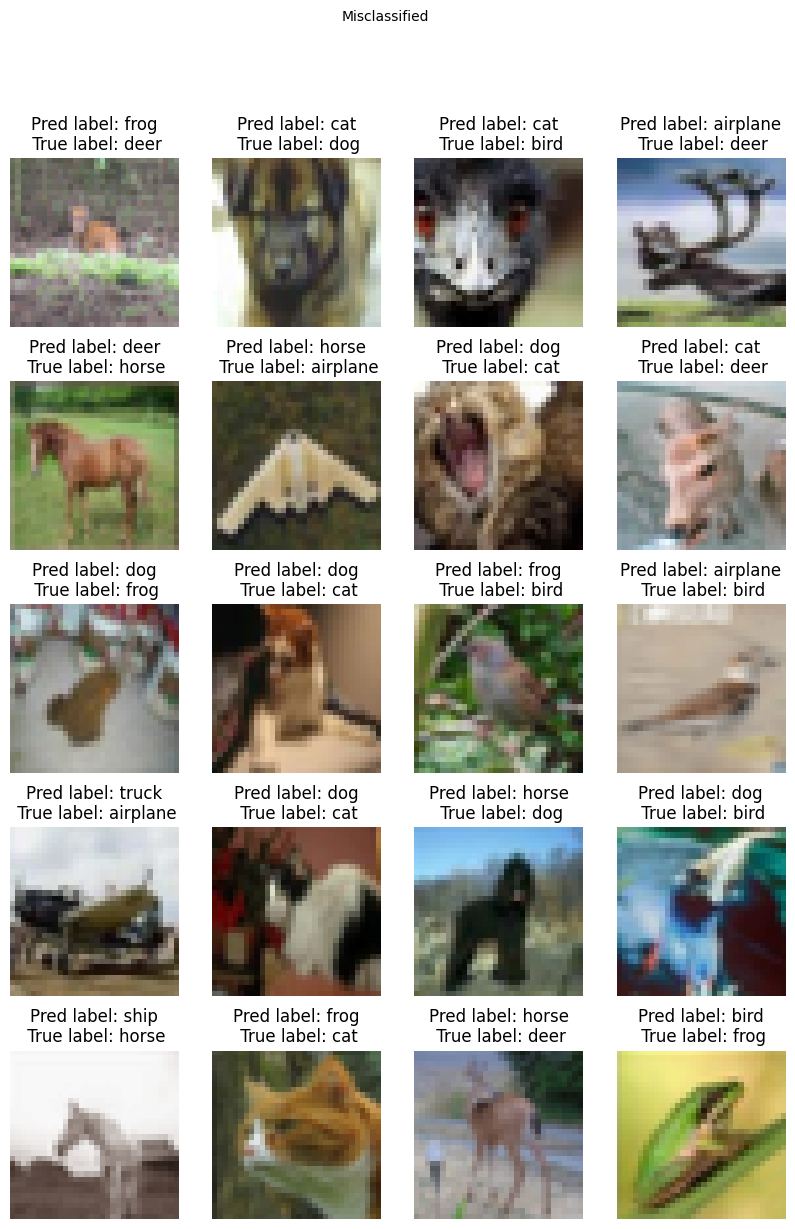

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 83 %

Accuracy of automobile : 93 %

Accuracy of  bird : 48 %

Accuracy of   cat : 54 %

Accuracy of  deer : 61 %

Accuracy of   dog : 64 %

Accuracy of  frog : 78 %

Accuracy of horse : 85 %

Accuracy of  ship : 76 %

Accuracy of truck : 81 %
{'airplane': 83.11258278145695, 'automobile': 93.31103678929766, 'bird': 48.80952380952381, 'cat': 54.22077922077922, 'deer': 61.37071651090343, 'dog': 64.21725239616613, 'frog': 78.94736842105263, 'horse': 85.57692307692308, 'ship': 76.82539682539682, 'truck': 81.875}


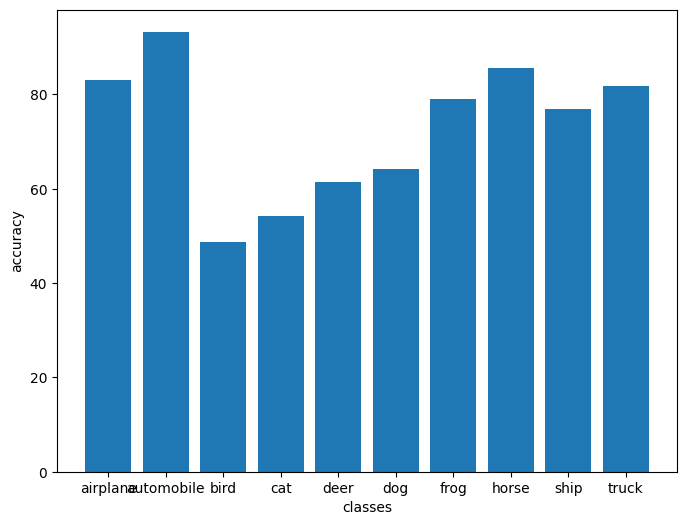

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)